# Training

In [6]:
%%capture
%pip install -r requirements.txt

In [7]:
import numpy as np
import tensorflow as tf;
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from entanglement_witnesses import all_entanglement_witnesses
import mlflow

In [8]:
mlflow.set_tracking_uri(
    "http://localhost:5000"
)

In [9]:
def get_model(name, data_file_path):

    data = np.load(data_file_path)
    simulated_states = data["states"]
    simulated_labels = data["labels"]

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(simulated_states.shape[1],)),  # Adjust input shape based on your data
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train, X_val, y_train, y_val = train_test_split(simulated_states, simulated_labels, test_size=0.2, random_state=42)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

    # Start an MLflow run and log the model
    with mlflow.start_run() as run:
        # Log the model
        mlflow.tensorflow.log_model(model, "model")

        # Log parameters
        mlflow.log_param("witness", name)

        # Evaluate the model and log metrics
        loss, accuracy = model.evaluate(X_val, y_val)
        mlflow.log_metric("loss", loss)
        mlflow.log_metric("accuracy", accuracy)
        
        # Register the model
        model_name = "QuantumStateClassifier-" + name
        model_uri = f"runs:/{run.info.run_id}/model"
        mlflow.register_model(model_uri, model_name)
        print(f"Model saved in run {run.info.run_id}")

    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model {} Accuracy'.format(name))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model {} Loss'.format(name))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model

Epoch 1/10


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-20 21:34:24.532514: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-20 21:34:24.559942: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentati

 76/150 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.6984 - loss: 0.6183

I0000 00:00:1716233665.861286   96020 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7185 - loss: 0.5865 - val_accuracy: 0.7625 - val_loss: 0.4630
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.7767 - loss: 0.4464 - val_accuracy: 0.8550 - val_loss: 0.3494
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.8526 - loss: 0.3350 - val_accuracy: 0.8708 - val_loss: 0.2700
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.8901 - loss: 0.2630 - val_accuracy: 0.9083 - val_loss: 0.2193
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.9277 - loss: 0.2043 - val_accuracy: 0.9500 - val_loss: 0.1690
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.9496 - loss: 0.1640 - val_accuracy: 0.9575 - val_loss: 0.1343
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.9635 - loss: 0.1279 - val_accuracy: 0.9608 - val_loss: 0.1279
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.9624 - loss: 0.1132 - val_accuracy:

2024/05/20 21:34:27 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.9715 - loss: 0.0830


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'QuantumStateClassifier-CHSH' already exists. Creating a new version of this model...
2024/05/20 21:34:30 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CHSH, version 3
Created version '3' of model 'QuantumStateClassifier-CHSH'.


Model saved in run 193eaf3efa10435ca4f98c19a125d456


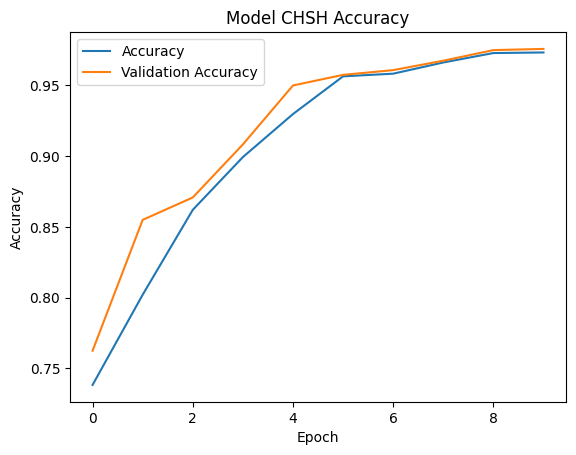

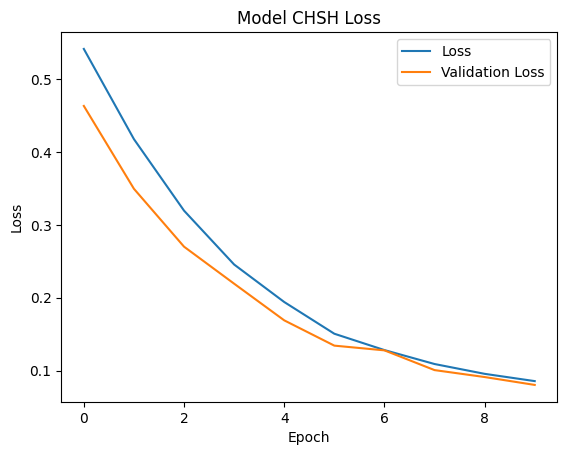

/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6503 - loss: 0.6188 - val_accuracy: 0.8625 - val_loss: 0.4150
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.8877 - loss: 0.3248 - val_accuracy: 0.9525 - val_loss: 0.1502
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.9585 - loss: 0.1269 - val_accuracy: 0.9750 - val_loss: 0.0977
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.9823 - loss: 0.0697 - val_accuracy: 0.9800 - val_loss: 0.0833
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.9826 - loss: 0.0637 - val_accuracy: 0.9808 - val_loss: 0.0793
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.9850 - loss: 0.0574 - val_accuracy: 0.9908 - val_loss: 0.0698
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.9898 - loss: 0.0367 - val_accuracy: 0.9900 - val_loss: 0.0690
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - accuracy: 0.9908 - loss: 0.0334 - va

2024/05/20 21:34:32 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.9926 - loss: 0.0658


Registered model 'QuantumStateClassifier-CONCURRENCE' already exists. Creating a new version of this model...
2024/05/20 21:34:34 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CONCURRENCE, version 3


Model saved in run f903837143fa486098673c38ffa025f6


Created version '3' of model 'QuantumStateClassifier-CONCURRENCE'.


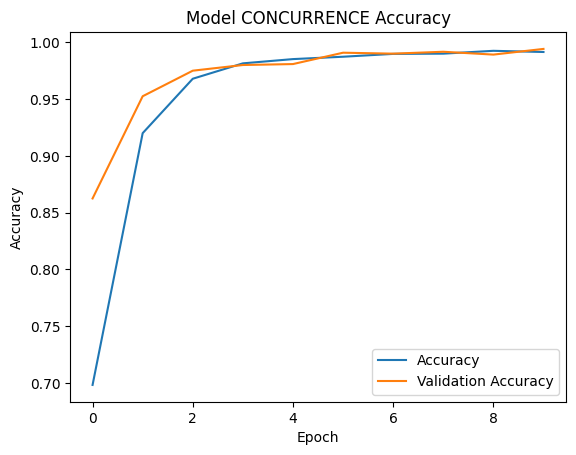

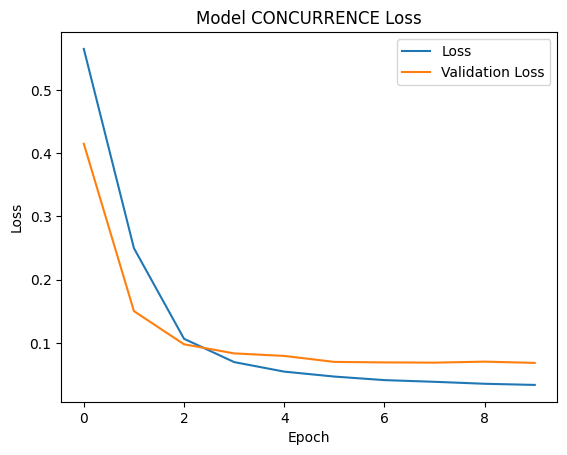

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6685 - loss: 0.6083 - val_accuracy: 0.8483 - val_loss: 0.3822
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.9051 - loss: 0.2873 - val_accuracy: 0.9558 - val_loss: 0.1374
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.9615 - loss: 0.1163 - val_accuracy: 0.9775 - val_loss: 0.0774
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.9804 - loss: 0.0650 - val_accuracy: 0.9900 - val_loss: 0.0586
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.9881 - loss: 0.0432 - val_accuracy: 0.9858 - val_loss: 0.0399
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.9915 - loss: 0.0320 - val_accuracy: 0.9858 - val_loss: 0.0365
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.9926 - loss: 0.0254 - val_accuracy: 0.9925 - val_loss: 0.0281
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.9937 - loss: 0.0207 - va

2024/05/20 21:34:37 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.9927 - loss: 0.0233


Registered model 'QuantumStateClassifier-ENTROPY' already exists. Creating a new version of this model...
2024/05/20 21:34:39 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-ENTROPY, version 3


Model saved in run cc6c1401c9e24caba2c32a9629b9e586


Created version '3' of model 'QuantumStateClassifier-ENTROPY'.


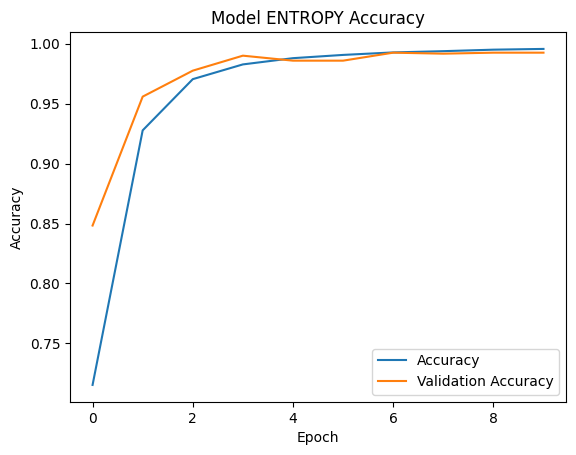

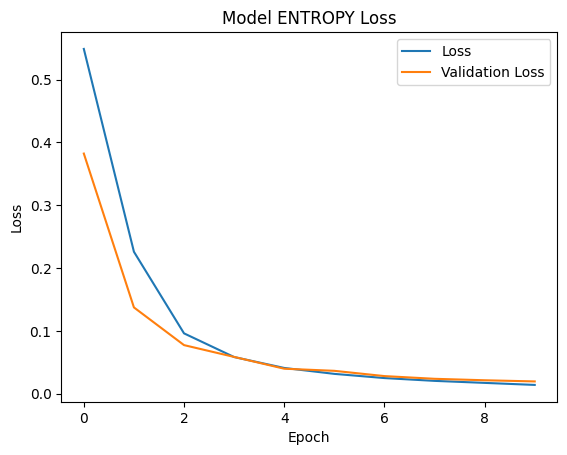

Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6728 - loss: 0.6067 - val_accuracy: 0.8392 - val_loss: 0.4267
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.8759 - loss: 0.3316 - val_accuracy: 0.9408 - val_loss: 0.1582
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.9626 - loss: 0.1264 - val_accuracy: 0.9767 - val_loss: 0.0828
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.9787 - loss: 0.0676 - val_accuracy: 0.9850 - val_loss: 0.0538
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.9876 - loss: 0.0475 - val_accuracy: 0.9875 - val_loss: 0.0403
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.9895 - loss: 0.0330 - val_accuracy: 0.9908 - val_loss: 0.0308
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.9938 - loss: 0.0228 - val_accuracy: 0.9908 - val_loss: 0.0285
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.9924 - loss: 0.0229 - va

2024/05/20 21:34:41 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.9935 - loss: 0.0229


Registered model 'QuantumStateClassifier-NEGATIVITY' already exists. Creating a new version of this model...
2024/05/20 21:34:43 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-NEGATIVITY, version 3


Model saved in run fed6c5fbaa2b4031a50d1a4a93605458


Created version '3' of model 'QuantumStateClassifier-NEGATIVITY'.


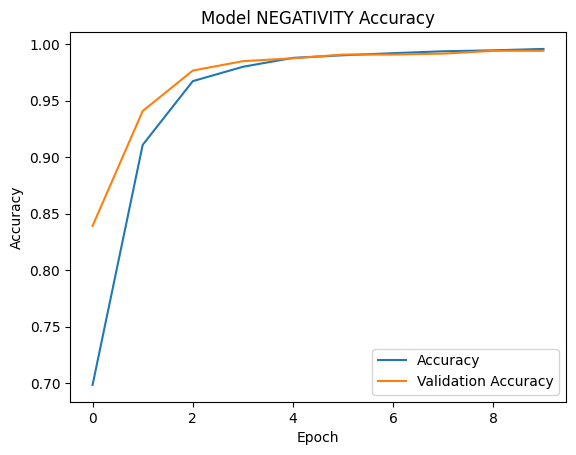

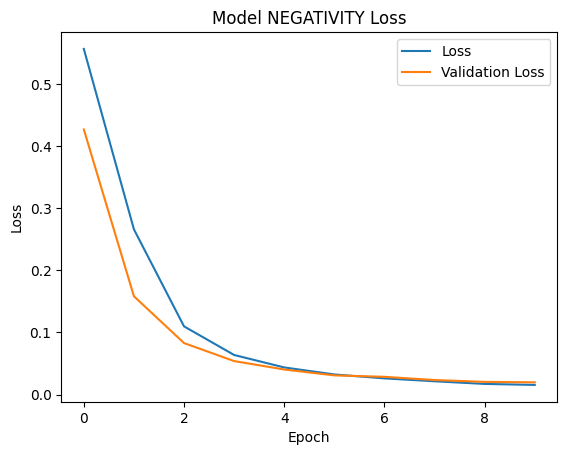

In [10]:
models = {}

mlflow.set_experiment('ML Quantum entanglement')

for name, witness in all_entanglement_witnesses.items():
    data_file_path = "./simulated_data/simulation-{}.npz".format(name)
    model = get_model(name, data_file_path)
    models[name] = {"model": model, "witness": witness}
